<a href="https://colab.research.google.com/github/Kirbha1103/Operations_Research/blob/main/Project_Assignments/LPAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Programming Assignment

## Redo a WeBWorK Question Using Python

Consider WW Set 03 Problem 3.  Using python, do the following:
1. Copy your problem here.
1. Find corner points.  
2. Graph feasible set.
3. Find the corner that maximizes the objective function $P = 3x+2y$.
4. Introduce slack variables, find the corner points again.
5. Solve using a built-in Linear Programming Solver.  Compare your answers.

Consider WW Set 04 Problem 6.  Using python, do the following:
1. Write the equations that describe the problem completely using $\LaTeX$ encoding.   
1. Find corner points.  
2. Graph feasible set.
3. Find the corner that maximizes the objective function.
4. Introduce slack variables, find the corner points again.
5. Solve using a built-in Linear Programming Solver.  Compare your answers.

Corner points (feasible candidates): [(0, 3), (2/7, 19/7)]


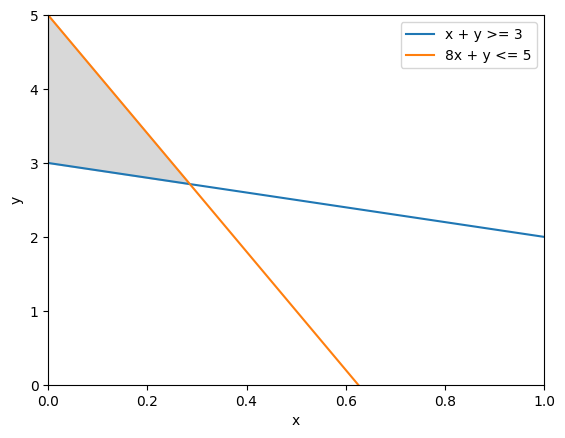

Corner (0, 3): P = 3
Corner (2/7, 19/7): P = 3
Optimal value P = 5.0
x, y = [0. 5.]


In [1]:

# Linear Programming Problem 3: x + y >= 3, 8x + y <=5, x,y>=0
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve
from scipy.optimize import linprog

# -------------------------
# Step 1: Define objective and constraints
# Maximize P = x + y -> linprog minimizes, so use -1
c = [-1, -1]

# Constraints in linprog format: A_ub * x <= b_ub
A = [
    [-1, -1],  # -x - y <= -3  (x + y >=3)
    [8, 1]     # 8x + y <= 5
]
b = [-3, 5]

# Variable bounds
x_bounds = (0, None)
y_bounds = (0, None)

# -------------------------
# Step 2: Find corner points using sympy
x, y = symbols('x y')
eq1 = Eq(x + y, 3)
eq2 = Eq(8*x + y, 5)
intersection = solve((eq1, eq2), (x, y))

# Candidate corners
corners = [
    (0, 3),             # x=0 in x+y>=3
    (intersection[x], intersection[y])
]

print("Corner points (feasible candidates):", corners)

# -------------------------
# Step 3: Graph feasible set
x_vals = np.linspace(0, 1, 400)
y1 = 3 - x_vals      # x+y>=3 -> y>=3-x
y2 = 5 - 8*x_vals    # 8x+y<=5 -> y<=5-8x

plt.fill_between(x_vals, y1, y2, where=(y2>=y1), color='grey', alpha=0.3)
plt.plot(x_vals, y1, label='x + y >= 3')
plt.plot(x_vals, y2, label='8x + y <= 5')
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# -------------------------
# Step 4: Evaluate objective function at corners
def objective(x_val, y_val):
    return x_val + y_val

for corner in corners:
    print(f"Corner {corner}: P = {objective(corner[0], corner[1])}")

# -------------------------
# Step 5: Solve using linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds])
print("Optimal value P =", -res.fun)
print("x, y =", res.x)